# Single-Layer Perceptron Model
## Jade Gee

---

## Background

The Perceptron Learning Algorithm was invented by Frank Rosenblatt at the Cornell Aeronautical Laboratory in 1958. Instead of the a program it became, initially it was intended to be a machine called the "Mark 1 perceptron" which was designed for image recognition. 

It was soon realized that the perceptrons were unable to be taught to recognize a significant number of pattern types which resulted in stagnation of the neural network research field up until the discovery of [multilayer perceptrons](https://en.wikipedia.org/wiki/Multilayer_perceptron). 

For the purpose of this project, we will be focusing on a single-layer perceptron which is a simplified model of a biological neuron.

---

## Overview of the Perceptron Learning Algorithm

A perceptron is a neural network unit--an artificial neuron--that does certain computations to detect features or business intelligence in the input data. It is a simple learning model in machine learning that utilizes supervised learning of binary classifiers. 

The binary classifier is a threshold function which maps its input $x$ to an output value $f(x)$--a real valued vector to a single binary value--where

\begin{align*}
  f(x) =
  \begin{cases}
  1 & \text{if $w\cdot x + b > 0$} \\
  0 & \text{if otherwise} \\
  \end{cases}
\end{align*}

and where $w$ is the vector of real-valued weights and $w \cdot x$ is the dot product $\sum_{i=1}^m w_i x_i$, where $m$ is the number of inputs to the perceptron, and $b$ is the bias which shifts the decision bounds away from the origin without input dependency.

Perceptron uses the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function) to activate it, and then, as a type of linear classifier, makes predictions based on a linear predictor function combining a set of weights with the feature vector as follows:

![Perceptron](perceptron.png)

When there is case $(x_1,y_1),\ldots, (x_N, y_N)$ that is initially misclassified at the $t$ and denoted by $(x(t), y(t))$. Since $(x(t), y(y))$ is misclassified,

\begin{align*}
y(t) \neq sign(w^{T}(t)x(t)).
\end{align*}

As such, we need to update this example so that $(x_1,y_1),\ldots, (x_N, y_N)$ is correctly classified. This brings us to the Perceptron Update Rule.

## Update Rule:

\begin{align*}
w(t+1)=w(t)+y(t)x(t)
\end{align*}

---

## Julia Programming Language

Using the Julia programming language to implement the Perceptron Learning Algorithm, we will classify data from the [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) and predict the species of flower based on the measurements of Sepal length and width. 

To begin, we will add the following packages:
- [RDatasets documentation](https://github.com/JuliaStats/RDatasets.jl)
    + In order to access the iris data set that is available in the core of R.
- [Plots documentation](http://docs.juliaplots.org/latest/)
    + In order to visualize the data set using plots.

In [193]:
using RDatasets
using Plots

---

Then will we extract the data from the Iris data set and store it in the variable `iris` for easier data manipulation and reference.

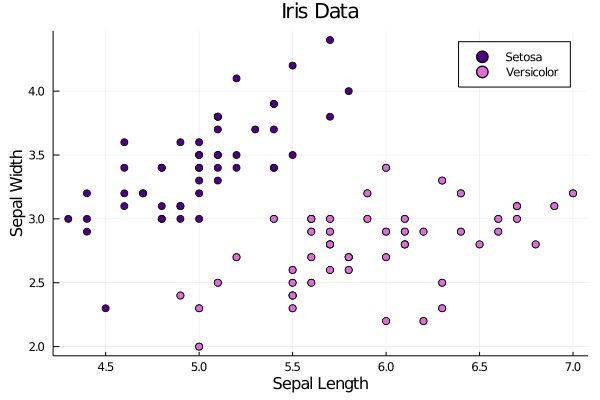

In [194]:
# Read the Iris dataset from RDatasets
iris = dataset("datasets", "iris")

# Extract the first two columns the first 100 entries in the dataset
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Encodes the Species label numerically
y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

# Plot the data to confirm linearly separable
scatter(x_data[1:100], 
    label = "Setosa", 
    xaxis = "Sepal Length", 
    yaxis = "Sepal Width", 
    color = "indigo",
    title = "Iris Data")

scatter!(x_data[51:100],
    color = "orchid",
    label = "Versicolor")

---
Since we can clearly see that our data is linearly separable, we are able to use a single-layer perceptron. Upon implementation, the perceptron will learn a linear separator that will divide the above data set into two groups. The line, defined by

\begin{align*}
y=mx+b
\end{align*}

will bissect the data so that all data points above the line, $y$, belong to one class of data and all below it, the other. Please keep in mind that if the data is not linearly separable, the Perceptron Learning Algorithm will not terminate; however, it will not ever properly classify all of the vectors as the perceptron aims to do. 

To begin, we need to created the functions to activate the perceptron model, update the weights, and count the number of misclassified data points.

In [195]:
#### The sign function call ####
"""
weights:  the coefficients that define the 3-dimensional plane
x̂:        data stored for x from the data set

Activates the Perceptron model using the Heaviside step function.
"""
function sign_func(weights, x)
    x̂ = [x[1], x[2], 1.0]
    return weights'x̂ > 0 ? 1 : -1
end



#### The update_perceptron function ####
"""
weights:  the coefficients that define the 3-dimensional plane
x:        data stored for x from the data set

Updates the weights (misclassified data) using the Perceptron Update Rule.
"""
function update_perceptron(weights, x, y)
    if sign_func(weights, x) != y
       weights += y*[x[1], x[2], 1.0]
    end
    return weights
end



#### The error function ####
"""
weights:  the coefficients that define the 3-dimensional plane
feature:  data stored for x from the data set
label:    numerical encoding of data's species

Function that counts the number of misclassified data.
"""
function error(weights, feature, label)
    return sum([sign_func(weights, feature[i]) != label[i] ? 1 : 0 for i = 1:length(feature)])
end


error

In [196]:
#### The Perceptron Learning Algorithm ####
"""
weights:  the coefficients that define the 3-dimensional plane
feature:  data stored for x from the data set
label:    numerical encoding of data's species
epsilon:  stopping point

Iterates the Perception Update Rule by randomly testing the data set entries.
"""
function perceptron_algorithm(weights, feature, label, ϵ)
    
    error_measurements = [] #Create empty vector to store errors
    append!(error_measurements, error(weights, feature, label))
    
    weight_vector = [] #Create empty vector to store weights

    while error(weights, feature, label) > ϵ
        for i = 1:length(feature)
           weights = update_perceptron(weights, feature[i], label[i])
        end
        
        #Add weights to weight vector
        append!(weight_vector, weights)
        
        #Adds errors to error vector
        append!(error_measurements, error(weights, feature, label))
    end
    return weights, weight_vector, error_measurements
end

perceptron_algorithm

We will proceed to run the Perceptron Learning Algorithm by assigning random weights to the `weights` variable and a stopping point to the `ϵ` variable.

In [200]:
# Run the function
# Assign random weights to weights (weights = randn(3))
# Assign a stopping point to epsilon
w, W, errors = perceptron_algorithm(randn(3), x_data, y_data, 2)

([-24.879018298587702, 37.132528496791494, 12.170651383069437], Any[-3.3790182985876913, -1.3674715032085023, 0.17065138306943783, -5.279018298587692, -1.0674715032085027, 0.17065138306943783, -7.1790182985876925, -0.7674715032085029, 0.17065138306943783, -4.1790182985876925  …  11.170651383069437, -26.079018298587698, 34.8325284967915, 11.170651383069437, -27.4790182985877, 34.5325284967915, 11.170651383069437, -24.879018298587702, 37.132528496791494, 12.170651383069437], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  40, 48, 3, 28, 40, 46, 3, 24, 40, 2])

---

The 2-dimensional data set that the perceptron will learn defines the following 3-dimensional plane:

\begin{align*}
x_3=w_1x_1+w_2x_2+w_3
\end{align*}

By setting the equation equal to zero (0) and solving for $x_2$, we get the following line in 2-dimensional space:
    
\begin{align*}
x_2=-x_1\frac{w_1}{w_2}-\frac{w_3}{w_2}
\end{align*}

This line is the learned line generated by the Perceptron Learning Algorithm. Overlaying this line on the `iris` scatter plot will show that our data has been split into two distinct groups.

---

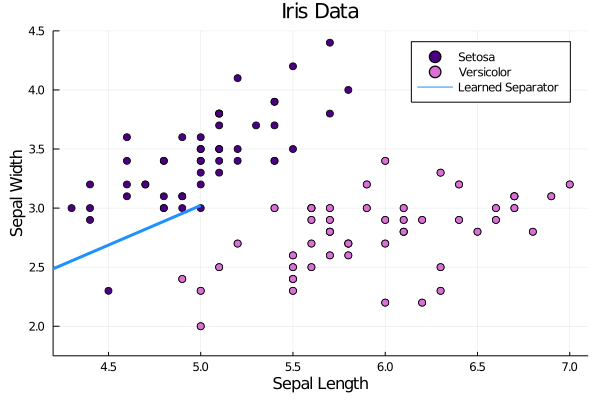

In [201]:
# Plot the learned function
scatter(x_data[1:100], 
    label = "Setosa", 
    xaxis = "Sepal Length", 
    xlim = (4.2,7.1),
    yaxis = "Sepal Width", 
    ylim = (1.75,4.5),
    color = "indigo",
    title = "Iris Data")

scatter!(x_data[51:100],
    color = "orchid",
    label = "Versicolor")

plot!(x -> (-x*w[1]-w[3])/w[2], 
    label = "Learned Separator", 
    color = "dodgerblue", lw = 3)

---

Using the documented errors that were stored in the `error_measurements` vector, we are also able to see that the number of misclassified data points are reduced with each iteration of the Perceptron Learning Algorithm.

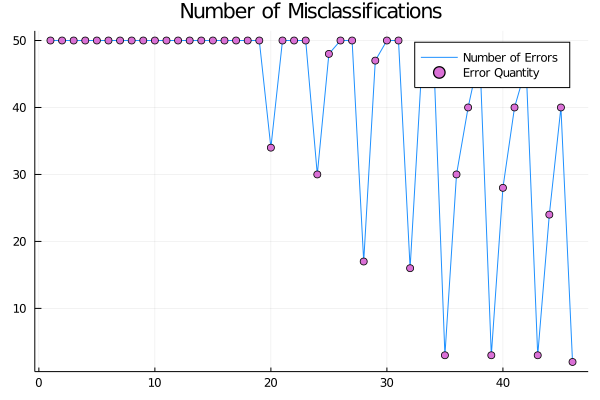

In [202]:
# Plot the Errors to show reduction in errors

plot(errors, 
    label="Number of Errors",
    color="dodgerblue",
    title= "Number of Misclassifications")
scatter!(errors,
    color="orchid",
    label = "Error Quantity")

# Conclusion

For additional information regarding the perceptron, you may visit the following websites:
+ [Perceptron on Wiki](https://en.wikipedia.org/wiki/Perceptron#History)
+ [What the Hell is Perceptron?](https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53)
+ [Simplilearn - Perceptron](https://www.simplilearn.com/what-is-perceptron-tutorial#:~:text=A%20perceptron%20is%20a%20neural,on%20the%20original%20MCP%20neuron.)